# Assignment 06 - Weather

Author: Marcin Kaminski

In [1]:
# Imports

import pandas as pd # Data analysis library
import numpy as np # Numerical computing library
import matplotlib.pyplot as plt # Plotting library
import seaborn as sns
import datetime 

## Getting Data

In [2]:
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, low_memory=False) 
# We need to ignore the first 23 rows and remove DtypeWarning
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


Columns:

date:  -  Date and Time (utc)

rain:  -  Precipitation Amount (mm)

temp:  -  Air Temperature (C)

wetb:  -  Wet Bulb Temperature (C)

dewpt: -  Dew Point Temperature (C) 

rhum:  -  Relative Humidity (%)

vappr: -  Vapour Pressure (hPa)

msl:   -  Mean Sea Level Pressure (hPa)

wdsp:  -  Mean Wind Speed (knot)

wddir: -  Predominant Wind Direction (degree)

ww:    -  Synop code for Present Weather

w:     -  Synop code for Past Weather
sun:   -  Sunshine duration (hours)

vis:   -  Visibility (m)

clht:  -  Cloud height (100's of ft) - 999 if none 

clamt: -  Cloud amount

ind:   -  Indicator

In [3]:
df.info() # Let's check data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256434 entries, 0 to 256433
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    256434 non-null  object 
 1   ind     256434 non-null  int64  
 2   rain    256434 non-null  object 
 3   ind.1   256434 non-null  int64  
 4   temp    256434 non-null  float64
 5   ind.2   256434 non-null  int64  
 6   wetb    256434 non-null  float64
 7   dewpt   256434 non-null  float64
 8   vappr   256434 non-null  float64
 9   rhum    256434 non-null  int64  
 10  msl     256434 non-null  object 
 11  ind.3   256434 non-null  int64  
 12  wdsp    256434 non-null  object 
 13  ind.4   256434 non-null  int64  
 14  wddir   256434 non-null  object 
 15  ww      256434 non-null  object 
 16  w       256434 non-null  object 
 17  sun     256434 non-null  float64
 18  vis     256434 non-null  object 
 19  clht    256434 non-null  object 
 20  clamt   256434 non-null  object 
dtypes: float64

## Cleaning Data

In [4]:
# Detect missing values
print(df.isnull().sum())

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64


I am trying to drop rows with missing values, however .isnull() option does not recognize the missing values.

Solution:
https://stackoverflow.com/questions/29314033/drop-rows-containing-empty-cells-from-a-pandas-dataframe

In [5]:
cleandf = df[["date", "temp", "wdsp"]].copy() # make a new dataframe with only the date, air temperature and mean wind speed
cleandf.head(5)

,date,temp,wdsp
0,10-apr-1996 14:00,11.5,0
1,31-jul-1996 08:00,11.5,0
2,31-jul-1996 09:00,11.6,0
3,31-jul-1996 10:00,12.9,0
4,31-jul-1996 11:00,14.5,0


In [6]:
# replace the spaces with NaN
cleandf['wdsp'] = cleandf['wdsp'].replace(' ', np.nan) # replace the spaces with NaN

cleandf.dropna(inplace=True) # drop the rows with NaN values

#cleandf.head(5) # check the new dataframe


In [7]:
cleandf = cleandf.copy()
cleandf['date'] = pd.to_datetime(cleandf['date'], format='%d-%b-%Y %H:%M', errors='coerce')

In [8]:
cleandf["wdsp"] = cleandf["wdsp"].astype(float) # convert the wind speed to floats

In [9]:
cleandf.info() # Let's check data types 

<class 'pandas.core.frame.DataFrame'>
Index: 256384 entries, 0 to 256433
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    256384 non-null  datetime64[ns]
 1   temp    256384 non-null  float64       
 2   wdsp    256384 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 7.8 MB


## Analysing Data

In [10]:
cleandf.columns.tolist()

['date', 'temp', 'wdsp']

In [11]:
# Setting the index to the datetime

""" If you would like to do some analysis on the data based on time, 
you should set the index of the DataFrame to be the date"""

cleandf.set_index('date', inplace=True)
cleandf.head(3)

,temp,wdsp
date,,
1996-04-10 14:00:00,11.5,0.0
1996-07-31 08:00:00,11.5,0.0
1996-07-31 09:00:00,11.6,0.0


### Temperature

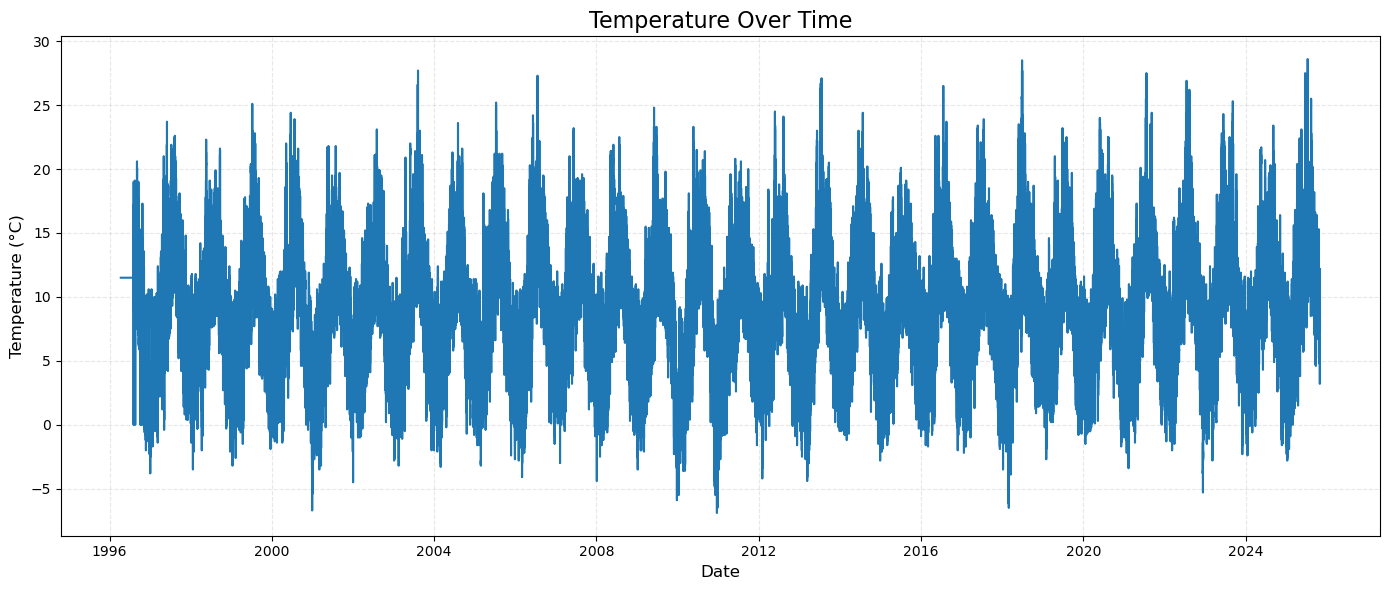

In [12]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=cleandf, x="date", y="temp")

plt.title("Temperature Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)

plt.grid(True, which="both", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

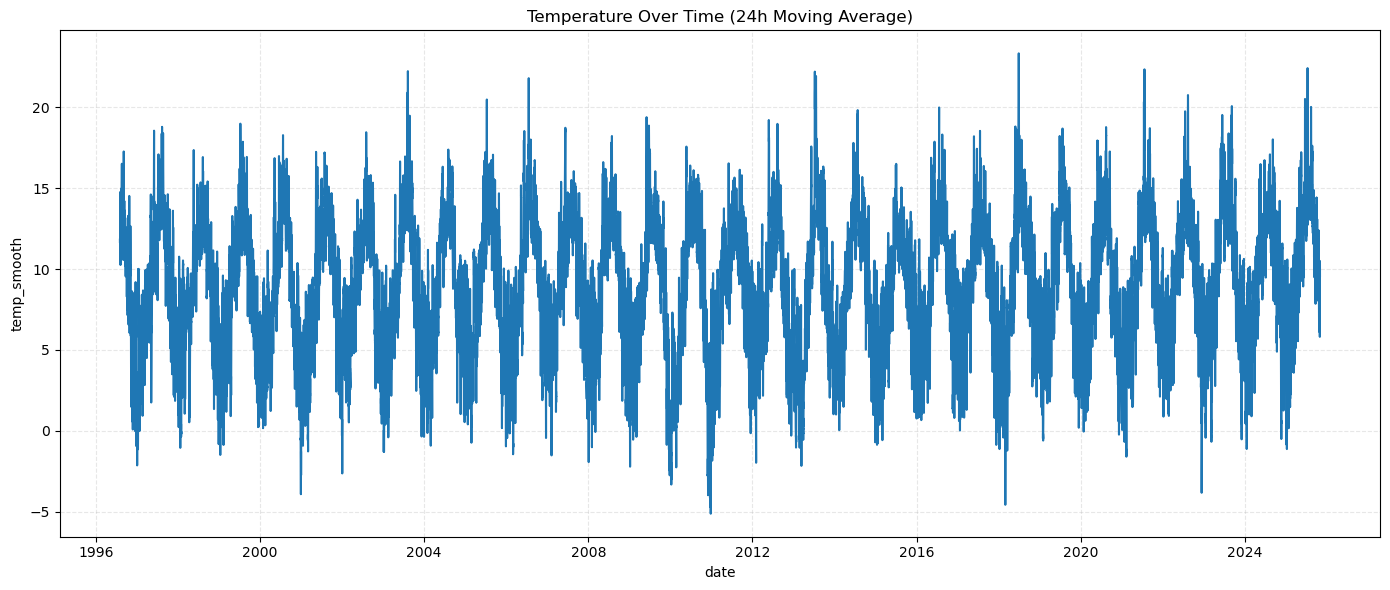

In [13]:
# Smoothing the line (moving average) to reduce noise

cleandf['temp_smooth'] = cleandf['temp'].rolling(window=24, center=True).mean()

plt.figure(figsize=(14, 6))
sns.lineplot(data=cleandf, x="date", y="temp_smooth")

plt.title("Temperature Over Time (24h Moving Average)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Mean Temperature Each Day

In [22]:
# Getting mean temperature each day

daily_mean_temp = cleandf.resample('D')['temp'].mean().reset_index()

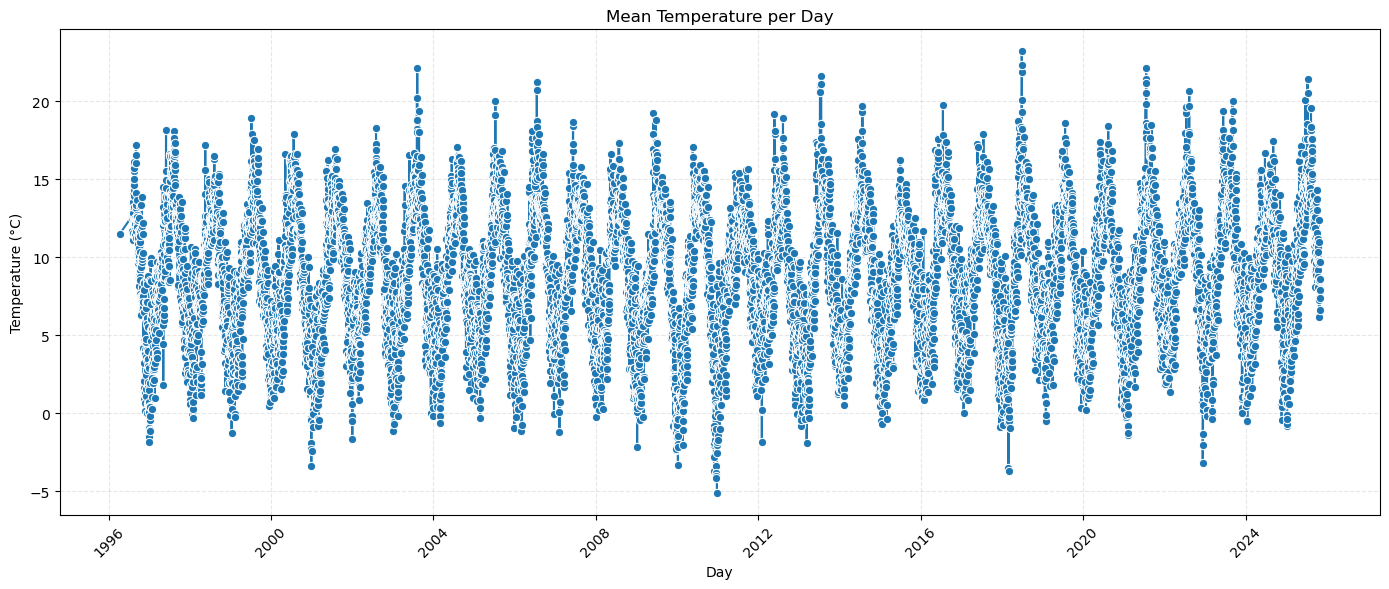

In [24]:
plt.figure(figsize=(14,6))
sns.lineplot(data=daily_mean_temp, x='date', y='temp', marker='o')

plt.title("Mean Temperature per Day")
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)

plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

### Mean Temperature Each Month

In [25]:
# Getting mean temperature each month

monthly_mean_temp = cleandf.resample('ME')['temp'].mean().reset_index()

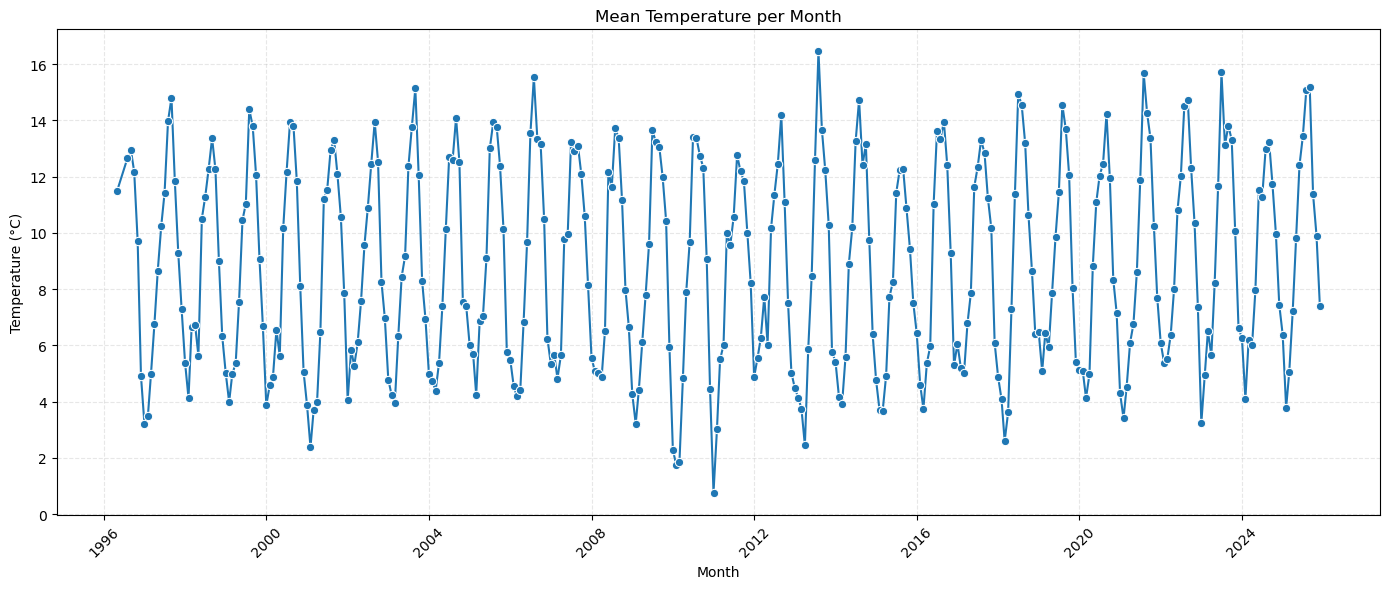

In [26]:
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_mean_temp, x='date', y='temp', marker='o')

plt.title("Mean Temperature per Month")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)

plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()